# Quantum Volume

In [21]:
import qiskit

In [22]:
from qiskit.circuit.library import QuantumVolume as QuantumVolumeCircuit
qv_circuit = QuantumVolumeCircuit(4)
qv_circuit.decompose().draw()  # .decompose() unrolls the circuit one level

┌──────────┐            ┌──────────┐            ┌──────────┐┌──────────┐»
q_0: ┤0         ├────────────┤0         ├────────────┤1         ├┤0         ├»
     │          │┌──────────┐│          │┌──────────┐│  su4_542 ││          │»
q_1: ┤  su4_103 ├┤1         ├┤  su4_759 ├┤1         ├┤0         ├┤  su4_272 ├»
     │          ││          ││          ││          │├──────────┤│          │»
q_2: ┤1         ├┤  su4_799 ├┤1         ├┤  su4_712 ├┤1         ├┤1         ├»
     └──────────┘│          │└──────────┘│          ││  su4_487 │└──────────┘»
q_3: ────────────┤0         ├────────────┤0         ├┤0         ├────────────»
                 └──────────┘            └──────────┘└──────────┘            »
«                 
«q_0: ────────────
«     ┌──────────┐
«q_1: ┤1         ├
«     │          │
«q_2: ┤  su4_441 ├
«     │          │
«q_3: ┤0         ├
«     └──────────┘

In [23]:
qv_circuit.draw()

┌───────────────────────────┐
q_0: ┤0                          ├
     │                           │
q_1: ┤1                          ├
     │  quantum_volume_[4,4,171] │
q_2: ┤2                          ├
     │                           │
q_3: ┤3                          ├
     └───────────────────────────┘

Transpile the circuit to the native gates

In [24]:
from qiskit import transpile
from qiskit_aer import Aer

In [25]:
backend = Aer.get_backend('aer_simulator')

Aer all possible instructions

In [26]:
config = backend.configuration()
# Allowed gates
# config.basis_gates

In [27]:
decomposed_circuit = transpile(qv_circuit, basis_gates=['rx', "ry", "rz", "cz"], optimization_level=3)

In [28]:
decomposed_circuit.draw()

┌─────────────┐ ┌────────────┐┌─────────────┐   ┌─────────────┐»
q_0: ┤ Rz(-1.9846) ├─┤ Ry(2.4692) ├┤ Rz(-1.4288) ├─■─┤ Rx(0.76182) ├»
     └┬────────────┤ ├────────────┤└┬────────────┤ │ └─────────────┘»
q_1: ─┤ Rz(-2.387) ├─┤ Ry(1.6178) ├─┤ Rz(1.9871) ├─┼────────■───────»
     ┌┴────────────┤┌┴────────────┤┌┴────────────┤ │        │       »
q_2: ┤ Rz(-2.3461) ├┤ Ry(0.93845) ├┤ Rz(-3.0217) ├─■────────┼───────»
     └┬────────────┤└┬────────────┤└┬────────────┤          │       »
q_3: ─┤ Rz(2.2538) ├─┤ Ry(1.0008) ├─┤ Rz(2.4747) ├──────────■───────»
      └────────────┘ └────────────┘ └────────────┘                  »
«                                      ┌─────────┐┌─────────────┐»
«q_0: ───────────────────────────────■─┤ Rz(π/2) ├┤ Ry(0.39887) ├»
«     ┌─────────────┐                │ └─────────┘└─┬─────────┬─┘»
«q_1: ┤ Rx(0.59082) ├────────────────┼──────■───────┤ Rz(π/2) ├──»
«     └─┬─────────┬─┘┌─────────────┐ │      │       ├─────────┴┐ »
«q_2: ──┤ Ry(π/2) ├──┤ Rz(-3.0101) ├─■──────┼───────┤ Ry(-π/2) ├─»
«       ├─────────┤  └┬────────────┤        │       ├──────────┤ »
«q_3: ──┤ Ry(π/2) ├───┤ Rz(-2.821) ├────────■───────┤ Ry(-π/2) ├─»
«       └─────────┘   └────────────┘                └──────────┘ »
«                        ┌───────────┐ ┌────────────┐┌─────────────┐ »
«q_0: ─────────────────■─┤ Rz(3.073) ├─┤ Ry(2.0553) ├┤ Rz(0.29096) ├─»
«     ┌──────────────┐ │ └───────────┘┌┴────────────┤└┬────────────┤ »
«q_1: ┤ Ry(-0.13544) ├─┼───────■──────┤ Rz(0.67815) ├─┤ Ry(2.7734) ├─»
«     ├──────────────┤ │       │      └┬───────────┬┘┌┴────────────┤ »
«q_2: ┤ Rz(0.053058) ├─■───────┼───────┤ Ry(2.068) ├─┤ Rz(-2.9474) ├─»
«     └┬────────────┬┘         │      ┌┴───────────┴┐├─────────────┴┐»
«q_3: ─┤ Rz(4.0623) ├──────────■──────┤ Ry(0.71525) ├┤ Rz(-0.41862) ├»
«      └────────────┘                 └─────────────┘└──────────────┘»
«                                    ┌─────────────┐                           »
«q_0: ───────────────────────■───────┤ Rx(0.76173) ├────────────────────■──────»
«     ┌──────────────┐       │       └─┬─────────┬─┘┌─────────────┐     │      »
«q_1: ┤ Rz(-0.86945) ├───────■─────────┤ Ry(π/2) ├──┤ Rz(-3.0786) ├─────■──────»
«     └──────────────┘┌─────────────┐  └─────────┘  └─────────────┘┌─────────┐ »
«q_2: ───────■────────┤ Rx(0.57344) ├──────────────────────■───────┤ Rz(π/2) ├─»
«            │        └─┬─────────┬─┘┌─────────────┐       │       ├─────────┴┐»
«q_3: ───────■──────────┤ Ry(π/2) ├──┤ Rz(-2.2907) ├───────■───────┤ Ry(-π/2) ├»
«                       └─────────┘  └─────────────┘               └──────────┘»
«       ┌─────────┐   ┌──────────────┐               ┌──────────────┐»
«q_0: ──┤ Rz(π/2) ├───┤ Ry(-0.39515) ├───────■───────┤ Rz(-0.73818) ├»
«       ├─────────┴┐  ├─────────────┬┘       │       └┬────────────┬┘»
«q_1: ──┤ Ry(-π/2) ├──┤ Rz(-1.5321) ├────────■────────┤ Ry(1.9233) ├─»
«     ┌─┴──────────┴─┐└─────────────┘ ┌─────────────┐ ├────────────┤ »
«q_2: ┤ Ry(-0.28824) ├───────■────────┤ Rz(-1.1234) ├─┤ Ry(1.1526) ├─»
«     └┬────────────┬┘       │        └┬────────────┤┌┴────────────┤ »
«q_3: ─┤ Rz(3.1753) ├────────■─────────┤ Ry(1.0307) ├┤ Rz(0.14329) ├─»
«      └────────────┘                  └────────────┘└─────────────┘ »
«      ┌────────────┐┌────────────┐               ┌─────────────┐»
«q_0: ─┤ Ry(2.7001) ├┤ Rz(2.3086) ├───────■───────┤ Rx(0.83161) ├»
«     ┌┴────────────┤└────────────┘       │       └─┬─────────┬─┘»
«q_1: ┤ Rz(-1.3304) ├──────■──────────────┼─────────┤ Ry(π/2) ├──»
«     ├─────────────┤      │              │         ├─────────┤  »
«q_2: ┤ Rz(-2.1839) ├──────┼──────────────■─────────┤ Ry(π/2) ├──»
«     └─────────────┘      │       ┌─────────────┐  └─────────┘  »
«q_3: ─────────────────────■───────┤ Rx(0.77289) ├───────────────»
«                                  └─────────────┘               »
«                                    ┌─────────┐   ┌─────────────┐    »
«q_0: ───────────────────────■───────┤ Rz(π/2) ├───┤ Ry(0.38141) ├────»
«     ┌───────────

In [ ]:
decomposed_circuit.

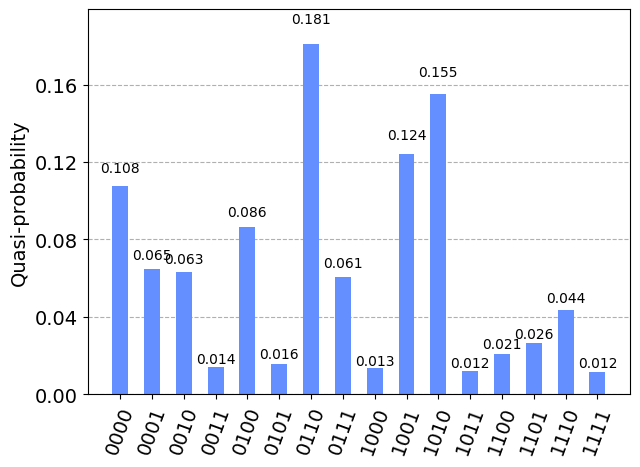

In [29]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
ideal_results = Statevector.from_instruction(qv_circuit).probabilities_dict()
plot_histogram(ideal_results)

In [30]:
def get_heavy_outputs(counts):
    """Extract heavy outputs from counts dict.
    Args:
        counts (dict): Output of `.get_counts()`
    Returns:
        list: All states with measurement probability greater
              than the mean.
    """
    # sort the keys of `counts` by value of counts.get(key)
    sorted_counts = sorted(counts.keys(), key=counts.get)
    # discard results with probability < median
    heavy_outputs = sorted_counts[len(sorted_counts)//2:]
    return heavy_outputs

print(get_heavy_outputs(ideal_results))

['0111', '0010', '0001', '0100', '0000', '1001', '1010', '0110']


In [31]:

def check_threshold(nheavies, ncircuits, nshots):
    """Evaluate adjusted threshold inequality for quantum volume.
    Args:
        nheavies (int): Total number of heavy outputs measured from device
        ncircuits (int): Number of different square circuits run on device
        nshots (int): Number of shots per circuit
    Returns:
        Bool:
            True if heavy output probability is > 2/3 with 97% certainty,
            otherwise False
    """
    from numpy import sqrt
    numerator = nheavies - 2*sqrt(nheavies*(nshots-(nheavies/ncircuits)))
    return bool(numerator/(ncircuits*nshots) > 2/3)

In [32]:
from qiskit import transpile
def test_qv(device, nqubits, ncircuits, nshots):
    """Try to achieve 2**nqubits quantum volume on device.
    Args:
        device (qiskit.providers.Backend): Device to test.
        nqubits (int): Number of qubits to use for test.
        ncircuits (int): Number of different circuits to run on the device.
        nshots (int): Number of shots per circuit.
    Returns:
        Bool
            True if device passes test, otherwise False.
    """
    def get_ideal_probabilities(circuit):
        """Simulates circuit behaviour on a device with no errors."""
        state_vector = Statevector.from_instruction(
                circuit.remove_final_measurements(inplace=False)
            )
        return state_vector.probabilities_dict()

    def get_real_counts(circuit, backend, shots):
        """Runs circuit on device and returns counts dict."""
        t_circuit = transpile(circuit, backend)
        job = backend.run(t_circuit,
                          shots=shots,
                          memory=True)
        return job.result().get_counts()

    # generate set of random circuits
    qv_circuits = [
        QuantumVolumeCircuit(nqubits) for c in range(ncircuits)
    ]

    nheavies = 0  # number of measured heavy outputs
    for circuit in qv_circuits:
        # simulate circuit
        ideal_heavy_outputs = get_heavy_outputs(
            get_ideal_probabilities(circuit)
        )
        # run circuit on device
        circuit.measure_all()
        real_counts = get_real_counts(circuit, device, nshots)
        # record whether device result is in the heavy outputs
        for output, count in real_counts.items():
            if output in ideal_heavy_outputs:
                nheavies += count

    # do statistical check to see if device passes test
    is_pass = check_threshold(nheavies, ncircuits, nshots)
    # calculate percentage of measurements that are heavy outputs
    percent_heavy_outputs = nheavies*100/(ncircuits * nshots)

    print(f"Quantum Volume: {2**nqubits}\n"
          f"Percentage Heavy Outputs: {percent_heavy_outputs:.1f}%\n"
          f"Passed?: {is_pass}\n")
    return is_pass

In [36]:
from qiskit.providers.fake_provider import GenericBackendV2
backend_v2 = GenericBackendV2(num_qubits=4, basis_gates=['rx', 'ry', 'rz', 'cz'])
test_qv(backend_v2, 4, ncircuits=150, nshots=50)

Quantum Volume: 16
Percentage Heavy Outputs: 81.2%
Passed?: True



True